<h1> Importing libraries </h1>

In [404]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import keras
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

<h1> Load dataset </h1>


In [405]:
#Load dataset
dataset = pd.read_csv("heart_preprocessed.csv")


#Display dataset
print(dataset.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0    1    1   0         0     0    0        1        2      0      1.0      2   
1    1    1   0         1     0    1        0        1      1      3.1      0   
2    2    1   0         1     0    0        1        1      1      2.6      0   
3    1    1   0         1     0    0        1        2      0      0.0      2   
4    2    0   0         1     1    1        1        0      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


<h1>Preprocess Data </h1>

In [683]:
#Read target column as y
y=dataset.target

#Take all of column and drop target column as x
x=dataset.drop('target',axis=1)

#Normalizing data to value from 0-1
min_max_scaler = preprocessing.MinMaxScaler() 
x_scaled = min_max_scaler.fit_transform(x)

#Display normalized data
df = pd.DataFrame(x_scaled, columns = ['age','sex','cp', 'trestbps', 'chol', 'fbs','restecg' , 'thalach', 'exang', 'oldpeak' , 'slope' , 'ca' , 'thal'])
print(df.head())

# Split data into training and test 
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=4)

print("X_train shape : " , X_train.shape)
print("X_test shape : " , X_test.shape)
print("Y_train shape : " , y_train.shape)
print("Y_test shape : " , y_test.shape)

   age  sex   cp  trestbps  chol  fbs  restecg  thalach  exang   oldpeak  \
0  0.5  1.0  0.0       0.0   0.0  0.0      0.5      1.0    0.0  0.161290   
1  0.5  1.0  0.0       0.5   0.0  1.0      0.0      0.5    1.0  0.500000   
2  1.0  1.0  0.0       0.5   0.0  0.0      0.5      0.5    1.0  0.419355   
3  0.5  1.0  0.0       0.5   0.0  0.0      0.5      1.0    0.0  0.000000   
4  1.0  0.0  0.0       0.5   0.5  1.0      0.5      0.0    0.0  0.306452   

   slope    ca      thal  
0    1.0  0.50  1.000000  
1    0.0  0.00  1.000000  
2    0.0  0.00  1.000000  
3    1.0  0.25  1.000000  
4    0.5  0.75  0.666667  
X_train shape :  (717, 13)
X_test shape :  (308, 13)
Y_train shape :  (717,)
Y_test shape :  (308,)


In [697]:
# Input layer consists 13 neuron
# Hidden layer consists 10 neuron
# Output layer consists 1 neuron
# Activation function : sigmoid

model = Sequential()
model.add(Dense(10, input_dim=13, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
trained = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.2615 - accuracy: 0.4784 - val_loss: 0.2466 - val_accuracy: 0.5065
Epoch 2/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.2471 - accuracy: 0.4868 - val_loss: 0.2367 - val_accuracy: 0.5617
Epoch 3/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.2372 - accuracy: 0.5662 - val_loss: 0.2307 - val_accuracy: 0.6299
Epoch 4/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.2306 - accuracy: 0.6681 - val_loss: 0.2261 - val_accuracy: 0.7305
Epoch 5/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.2256 - accuracy: 0.7420 - val_loss: 0.2221 - val_accuracy: 0.7338
Epoch 6/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.2208 - accuracy: 0.7476 - val_loss: 0.2178 - val_accuracy: 0.7435
Epoch 7/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.2165 - accuracy: 0.7587 - val_loss: 0.2136 - val_accuracy: 0.7565
Epoch 

23/23 [==============================] - 0s 1ms/step - loss: 0.1241 - accuracy: 0.8424 - val_loss: 0.1281 - val_accuracy: 0.8214
Epoch 59/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1237 - accuracy: 0.8354 - val_loss: 0.1278 - val_accuracy: 0.8247
Epoch 60/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1234 - accuracy: 0.8354 - val_loss: 0.1274 - val_accuracy: 0.8279
Epoch 61/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1230 - accuracy: 0.8466 - val_loss: 0.1271 - val_accuracy: 0.8279
Epoch 62/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1228 - accuracy: 0.8368 - val_loss: 0.1271 - val_accuracy: 0.8279
Epoch 63/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1223 - accuracy: 0.8424 - val_loss: 0.1266 - val_accuracy: 0.8344
Epoch 64/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1220 - accuracy: 0.8494 - val_loss: 0.1262 - val_accuracy: 0.8279
Epoch 65/1000

23/23 [==============================] - 0s 1ms/step - loss: 0.1145 - accuracy: 0.8536 - val_loss: 0.1187 - val_accuracy: 0.8571
Epoch 116/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1141 - accuracy: 0.8563 - val_loss: 0.1184 - val_accuracy: 0.8539
Epoch 117/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1141 - accuracy: 0.8438 - val_loss: 0.1183 - val_accuracy: 0.8539
Epoch 118/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1140 - accuracy: 0.8438 - val_loss: 0.1182 - val_accuracy: 0.8539
Epoch 119/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1140 - accuracy: 0.8354 - val_loss: 0.1182 - val_accuracy: 0.8377
Epoch 120/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1138 - accuracy: 0.8396 - val_loss: 0.1181 - val_accuracy: 0.8409
Epoch 121/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1139 - accuracy: 0.8438 - val_loss: 0.1181 - val_accuracy: 0.8539
Epoch 1

Epoch 172/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1117 - accuracy: 0.8382 - val_loss: 0.1155 - val_accuracy: 0.8377
Epoch 173/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1117 - accuracy: 0.8410 - val_loss: 0.1154 - val_accuracy: 0.8442
Epoch 174/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1116 - accuracy: 0.8382 - val_loss: 0.1154 - val_accuracy: 0.8377
Epoch 175/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1118 - accuracy: 0.8424 - val_loss: 0.1153 - val_accuracy: 0.8442
Epoch 176/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1115 - accuracy: 0.8438 - val_loss: 0.1153 - val_accuracy: 0.8409
Epoch 177/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1116 - accuracy: 0.8438 - val_loss: 0.1153 - val_accuracy: 0.8442
Epoch 178/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1116 - accuracy: 0.8396 - val_loss: 0.1153 - val_accuracy:

Epoch 229/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1105 - accuracy: 0.8438 - val_loss: 0.1138 - val_accuracy: 0.8506
Epoch 230/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1104 - accuracy: 0.8466 - val_loss: 0.1138 - val_accuracy: 0.8539
Epoch 231/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1103 - accuracy: 0.8494 - val_loss: 0.1138 - val_accuracy: 0.8571
Epoch 232/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1105 - accuracy: 0.8494 - val_loss: 0.1138 - val_accuracy: 0.8506
Epoch 233/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1104 - accuracy: 0.8466 - val_loss: 0.1138 - val_accuracy: 0.8506
Epoch 234/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1103 - accuracy: 0.8466 - val_loss: 0.1137 - val_accuracy: 0.8539
Epoch 235/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1103 - accuracy: 0.8494 - val_loss: 0.1137 - val_accuracy:

Epoch 286/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1094 - accuracy: 0.8508 - val_loss: 0.1127 - val_accuracy: 0.8539
Epoch 287/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1097 - accuracy: 0.8424 - val_loss: 0.1127 - val_accuracy: 0.8604
Epoch 288/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1096 - accuracy: 0.8466 - val_loss: 0.1127 - val_accuracy: 0.8571
Epoch 289/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1095 - accuracy: 0.8508 - val_loss: 0.1127 - val_accuracy: 0.8539
Epoch 290/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1094 - accuracy: 0.8494 - val_loss: 0.1127 - val_accuracy: 0.8604
Epoch 291/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1093 - accuracy: 0.8508 - val_loss: 0.1126 - val_accuracy: 0.8539
Epoch 292/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1094 - accuracy: 0.8438 - val_loss: 0.1126 - val_accuracy:

Epoch 343/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1084 - accuracy: 0.8410 - val_loss: 0.1116 - val_accuracy: 0.8506
Epoch 344/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1084 - accuracy: 0.8466 - val_loss: 0.1116 - val_accuracy: 0.8539
Epoch 345/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1083 - accuracy: 0.8438 - val_loss: 0.1115 - val_accuracy: 0.8571
Epoch 346/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1084 - accuracy: 0.8494 - val_loss: 0.1116 - val_accuracy: 0.8571
Epoch 347/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1083 - accuracy: 0.8438 - val_loss: 0.1115 - val_accuracy: 0.8571
Epoch 348/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1082 - accuracy: 0.8424 - val_loss: 0.1115 - val_accuracy: 0.8506
Epoch 349/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1083 - accuracy: 0.8466 - val_loss: 0.1115 - val_accuracy:

Epoch 400/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1072 - accuracy: 0.8480 - val_loss: 0.1106 - val_accuracy: 0.8474
Epoch 401/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1074 - accuracy: 0.8480 - val_loss: 0.1105 - val_accuracy: 0.8539
Epoch 402/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1071 - accuracy: 0.8508 - val_loss: 0.1105 - val_accuracy: 0.8604
Epoch 403/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1072 - accuracy: 0.8494 - val_loss: 0.1105 - val_accuracy: 0.8571
Epoch 404/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1071 - accuracy: 0.8480 - val_loss: 0.1105 - val_accuracy: 0.8636
Epoch 405/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1071 - accuracy: 0.8494 - val_loss: 0.1105 - val_accuracy: 0.8636
Epoch 406/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1071 - accuracy: 0.8480 - val_loss: 0.1104 - val_accuracy:

Epoch 457/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1058 - accuracy: 0.8522 - val_loss: 0.1094 - val_accuracy: 0.8636
Epoch 458/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1057 - accuracy: 0.8536 - val_loss: 0.1094 - val_accuracy: 0.8571
Epoch 459/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1059 - accuracy: 0.8508 - val_loss: 0.1094 - val_accuracy: 0.8604
Epoch 460/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1058 - accuracy: 0.8508 - val_loss: 0.1094 - val_accuracy: 0.8571
Epoch 461/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1057 - accuracy: 0.8522 - val_loss: 0.1093 - val_accuracy: 0.8636
Epoch 462/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1057 - accuracy: 0.8536 - val_loss: 0.1092 - val_accuracy: 0.8636
Epoch 463/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1057 - accuracy: 0.8536 - val_loss: 0.1092 - val_accuracy:

Epoch 514/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1041 - accuracy: 0.8536 - val_loss: 0.1080 - val_accuracy: 0.8636
Epoch 515/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1042 - accuracy: 0.8550 - val_loss: 0.1080 - val_accuracy: 0.8636
Epoch 516/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1040 - accuracy: 0.8536 - val_loss: 0.1080 - val_accuracy: 0.8636
Epoch 517/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1040 - accuracy: 0.8522 - val_loss: 0.1080 - val_accuracy: 0.8636
Epoch 518/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1040 - accuracy: 0.8536 - val_loss: 0.1080 - val_accuracy: 0.8571
Epoch 519/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1041 - accuracy: 0.8522 - val_loss: 0.1079 - val_accuracy: 0.8636
Epoch 520/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1039 - accuracy: 0.8522 - val_loss: 0.1079 - val_accuracy:

Epoch 571/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1022 - accuracy: 0.8577 - val_loss: 0.1068 - val_accuracy: 0.8669
Epoch 572/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1022 - accuracy: 0.8563 - val_loss: 0.1068 - val_accuracy: 0.8604
Epoch 573/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1021 - accuracy: 0.8577 - val_loss: 0.1067 - val_accuracy: 0.8669
Epoch 574/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1021 - accuracy: 0.8563 - val_loss: 0.1067 - val_accuracy: 0.8636
Epoch 575/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1020 - accuracy: 0.8577 - val_loss: 0.1067 - val_accuracy: 0.8669
Epoch 576/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1021 - accuracy: 0.8577 - val_loss: 0.1066 - val_accuracy: 0.8669
Epoch 577/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1020 - accuracy: 0.8577 - val_loss: 0.1066 - val_accuracy:

Epoch 628/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1001 - accuracy: 0.8605 - val_loss: 0.1055 - val_accuracy: 0.8669
Epoch 629/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1000 - accuracy: 0.8619 - val_loss: 0.1055 - val_accuracy: 0.8669
Epoch 630/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1001 - accuracy: 0.8619 - val_loss: 0.1055 - val_accuracy: 0.8669
Epoch 631/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1000 - accuracy: 0.8619 - val_loss: 0.1054 - val_accuracy: 0.8669
Epoch 632/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0999 - accuracy: 0.8619 - val_loss: 0.1054 - val_accuracy: 0.8669
Epoch 633/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0999 - accuracy: 0.8675 - val_loss: 0.1054 - val_accuracy: 0.8701
Epoch 634/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0998 - accuracy: 0.8675 - val_loss: 0.1054 - val_accuracy:

Epoch 685/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0977 - accuracy: 0.8703 - val_loss: 0.1042 - val_accuracy: 0.8701
Epoch 686/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0977 - accuracy: 0.8703 - val_loss: 0.1043 - val_accuracy: 0.8701
Epoch 687/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0976 - accuracy: 0.8703 - val_loss: 0.1042 - val_accuracy: 0.8701
Epoch 688/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0978 - accuracy: 0.8703 - val_loss: 0.1043 - val_accuracy: 0.8701
Epoch 689/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0975 - accuracy: 0.8703 - val_loss: 0.1042 - val_accuracy: 0.8701
Epoch 690/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0975 - accuracy: 0.8703 - val_loss: 0.1042 - val_accuracy: 0.8701
Epoch 691/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0974 - accuracy: 0.8703 - val_loss: 0.1042 - val_accuracy:

Epoch 742/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0951 - accuracy: 0.8731 - val_loss: 0.1028 - val_accuracy: 0.8766
Epoch 743/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0950 - accuracy: 0.8745 - val_loss: 0.1027 - val_accuracy: 0.8766
Epoch 744/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0950 - accuracy: 0.8731 - val_loss: 0.1027 - val_accuracy: 0.8766
Epoch 745/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0948 - accuracy: 0.8731 - val_loss: 0.1026 - val_accuracy: 0.8766
Epoch 746/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0948 - accuracy: 0.8731 - val_loss: 0.1026 - val_accuracy: 0.8799
Epoch 747/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0948 - accuracy: 0.8745 - val_loss: 0.1026 - val_accuracy: 0.8766
Epoch 748/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0948 - accuracy: 0.8731 - val_loss: 0.1026 - val_accuracy:

Epoch 799/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0919 - accuracy: 0.8717 - val_loss: 0.1011 - val_accuracy: 0.8799
Epoch 800/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0917 - accuracy: 0.8717 - val_loss: 0.1011 - val_accuracy: 0.8701
Epoch 801/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0917 - accuracy: 0.8717 - val_loss: 0.1010 - val_accuracy: 0.8799
Epoch 802/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0916 - accuracy: 0.8717 - val_loss: 0.1010 - val_accuracy: 0.8701
Epoch 803/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0915 - accuracy: 0.8717 - val_loss: 0.1009 - val_accuracy: 0.8799
Epoch 804/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0915 - accuracy: 0.8717 - val_loss: 0.1009 - val_accuracy: 0.8701
Epoch 805/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0914 - accuracy: 0.8717 - val_loss: 0.1009 - val_accuracy:

Epoch 856/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0881 - accuracy: 0.8717 - val_loss: 0.0989 - val_accuracy: 0.8701
Epoch 857/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0881 - accuracy: 0.8717 - val_loss: 0.0989 - val_accuracy: 0.8701
Epoch 858/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0881 - accuracy: 0.8717 - val_loss: 0.0988 - val_accuracy: 0.8701
Epoch 859/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0879 - accuracy: 0.8717 - val_loss: 0.0988 - val_accuracy: 0.8701
Epoch 860/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0880 - accuracy: 0.8717 - val_loss: 0.0988 - val_accuracy: 0.8701
Epoch 861/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0879 - accuracy: 0.8717 - val_loss: 0.0987 - val_accuracy: 0.8701
Epoch 862/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0877 - accuracy: 0.8717 - val_loss: 0.0987 - val_accuracy:

Epoch 913/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0844 - accuracy: 0.8731 - val_loss: 0.0965 - val_accuracy: 0.8701
Epoch 914/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0842 - accuracy: 0.8731 - val_loss: 0.0964 - val_accuracy: 0.8701
Epoch 915/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0841 - accuracy: 0.8828 - val_loss: 0.0963 - val_accuracy: 0.8701
Epoch 916/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0841 - accuracy: 0.8828 - val_loss: 0.0962 - val_accuracy: 0.8701
Epoch 917/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0840 - accuracy: 0.8842 - val_loss: 0.0962 - val_accuracy: 0.8701
Epoch 918/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0840 - accuracy: 0.8787 - val_loss: 0.0963 - val_accuracy: 0.8701
Epoch 919/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0838 - accuracy: 0.8815 - val_loss: 0.0962 - val_accuracy:

Epoch 970/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0803 - accuracy: 0.9024 - val_loss: 0.0934 - val_accuracy: 0.8831
Epoch 971/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0802 - accuracy: 0.8996 - val_loss: 0.0933 - val_accuracy: 0.8831
Epoch 972/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0801 - accuracy: 0.8996 - val_loss: 0.0932 - val_accuracy: 0.8831
Epoch 973/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0801 - accuracy: 0.8968 - val_loss: 0.0932 - val_accuracy: 0.8799
Epoch 974/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0800 - accuracy: 0.8996 - val_loss: 0.0931 - val_accuracy: 0.8864
Epoch 975/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0800 - accuracy: 0.8982 - val_loss: 0.0930 - val_accuracy: 0.8864
Epoch 976/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0799 - accuracy: 0.9010 - val_loss: 0.0930 - val_accuracy:

In [698]:
train_score = model.evaluate(X_train, y_train, verbose=0)

print("Train loss : {:.2f}%".format(train_score[0] *100))
print("Train accuracy : {:.2f}%".format(train_score[1] *100))

test_score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss : {:.2f}%".format(test_score[0] *100))
print("Test accuracy : {:.2f}%".format(test_score[1] *100))

model.summary()


Train loss : 7.80%
Train accuracy : 90.24%
Test loss : 9.17%
Test accuracy : 88.64%
Model: "sequential_181"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_403 (Dense)           (None, 10)                140       
                                                                 
 dense_404 (Dense)           (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


<h1>Loss and Accuracy graph (for training and test data) </h1>

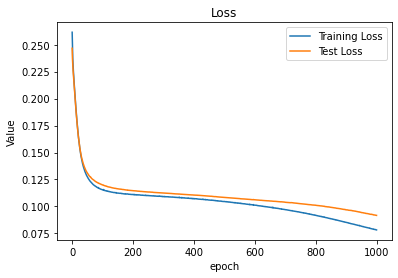

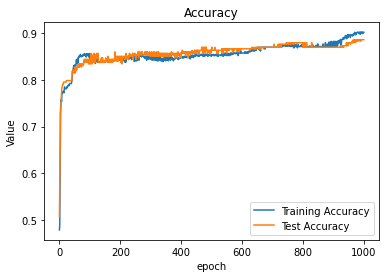

In [699]:
plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Loss')
plt.ylabel('Value')
plt.xlabel('epoch')
plt.legend(['Training Loss' , 'Test Loss'], loc='upper right')
plt.show()

plt.plot(trained.history['accuracy'] )
plt.plot(trained.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Value')
plt.xlabel('epoch')
plt.legend(['Training Accuracy' , 'Test Accuracy'], loc='lower right')
plt.show()

<h1>Making prediction 

In [688]:
y_pred = model.predict(X_test)
y_test = np.array(y_test)

hold_test = 0
true_pred = 0
swap_pred = []
false_pred = 0


for i in range(308):
    if y_pred[i] <= 0.5:
        swap_pred.append(0)
    else : 
        swap_pred.append(1)
        

for i in range(308) :
    
    if swap_pred[i] == y_test[i] :
        print("Predicted Value : " , swap_pred[i] , " Actual Value : " , y_test[i] , " [True]")
        true_pred = true_pred + 1
    else : 
        print("Predicted Value : " , swap_pred[i] , " Actual Value : " , y_test[i] , " [False]")
        false_pred = false_pred + 1
        
print("Total of correct prediction : " , true_pred)
print("Total of false prediction : " , false_pred)
print("Accuracy of prediction : {:.2f}%".format(true_pred/308 * 100))


10/10 [==============================] - 0s 445us/step
Predicted Value :  1  Actual Value :  1  [True]
Predicted Value :  1  Actual Value :  1  [True]
Predicted Value :  0  Actual Value :  1  [False]
Predicted Value :  0  Actual Value :  0  [True]
Predicted Value :  1  Actual Value :  1  [True]
Predicted Value :  1  Actual Value :  1  [True]
Predicted Value :  0  Actual Value :  0  [True]
Predicted Value :  0  Actual Value :  0  [True]
Predicted Value :  1  Actual Value :  1  [True]
Predicted Value :  1  Actual Value :  1  [True]
Predicted Value :  1  Actual Value :  1  [True]
Predicted Value :  1  Actual Value :  1  [True]
Predicted Value :  1  Actual Value :  1  [True]
Predicted Value :  1  Actual Value :  1  [True]
Predicted Value :  1  Actual Value :  1  [True]
Predicted Value :  0  Actual Value :  0  [True]
Predicted Value :  0  Actual Value :  0  [True]
Predicted Value :  0  Actual Value :  0  [True]
Predicted Value :  0  Actual Value :  0  [True]
Predicted Value :  0  Actual Val